# Test with many features, with noise and degeneracy.
Relies on the `make_classification` function from sklean

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from bayesvote import decoder
from bayesvote.dist import ConditionalKernelDensity


# Pretty plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "16"

# Uncomment for local development
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
# All data
N = 1000
test_size=0.5

X, y = make_classification(
    n_samples=N, n_classes=3, n_features=10, n_informative=5, n_redundant=1, n_repeated=1)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42)

<IPython.core.display.Javascript object>

In [3]:
print(set(y))

{0, 1, 2}


<IPython.core.display.Javascript object>

In [4]:
print(X.shape)

(1000, 10)


<IPython.core.display.Javascript object>

In [5]:
# Train dist
kde = ConditionalKernelDensity()
kde.fit(X_train, y_train)

<IPython.core.display.Javascript object>

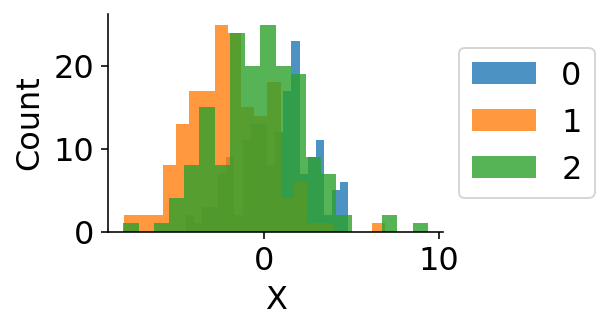

<IPython.core.display.Javascript object>

In [6]:
# Choose col
j = 1

# Vis
plt.figure(figsize=(3, 2))
plt.hist(X_train[y_train == 0, j], alpha=0.8, bins=20, label="0")
plt.hist(X_train[y_train == 1, j], alpha=0.8, bins=20, label="1")
plt.hist(X_train[y_train == 2, j], alpha=0.8, bins=20, label="2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("X")
plt.ylabel("Count")
sns.despine()

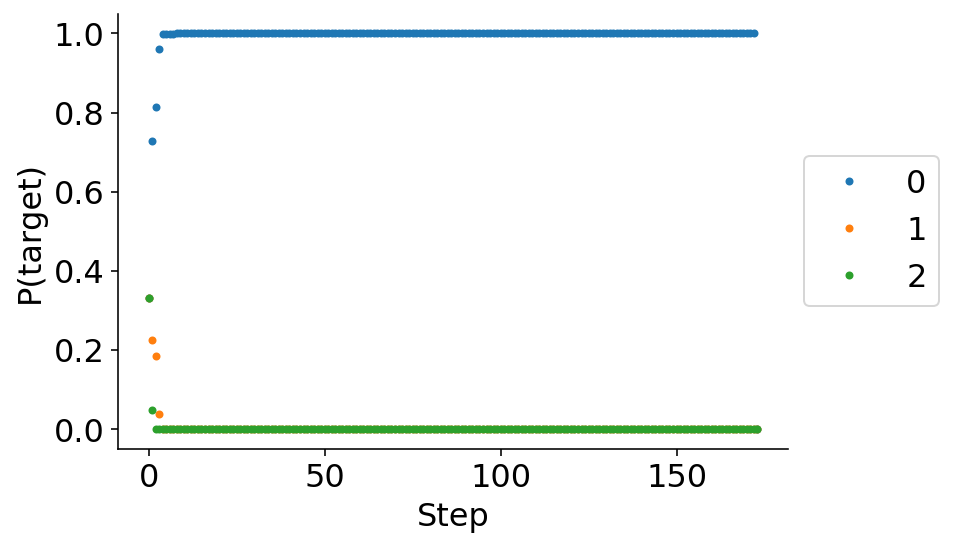

<IPython.core.display.Javascript object>

In [7]:
# Test data
sel = 0
X_sel, y_sel = X_test[y_test == sel], y_test[y_test == sel]

# Decode
X_decode = decoder(X_sel, y_sel, 0.33, kde)

# Vis
plt.plot(X_decode[:, 0], '.', label="0")
plt.plot(X_decode[:, 1], '.', label="1")
plt.plot(X_decode[:, 2], '.', label="2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Step")
plt.ylabel("P(target)")
sns.despine()